# Načteme si package, které budeme potřebovat

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Načteme si dataset do dataFramu z Pandasu

In [4]:
df = pd.read_csv('/content/student-por.csv')

# Podíváme se na basic informace v našem datasetu

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Zjistil jsem si:

počet Záznamů a sloupců

datové typy

že neexistují žádné missing values ani duplikáty

paměťovou náročnost

In [6]:
print(df.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

Zobrazíme si základní statistické hodnoty jako průměr, medián, minimum, maximum atd. pro numerické sloupce.

# Formulace Hypotéz

Má množství absencí vliv na závěrečnou známku (G3)?

Jak se liší průměrné známky mezi pohlavími (sex)?

Ovlivňuje konzumace alkoholu během týdne (Dalc) a víkendu (Walc) akademické výsledky?

Jaký vliv má studijní čas (studytime) na výslednou známku?

# Vizualizace Kategoriálních Dat

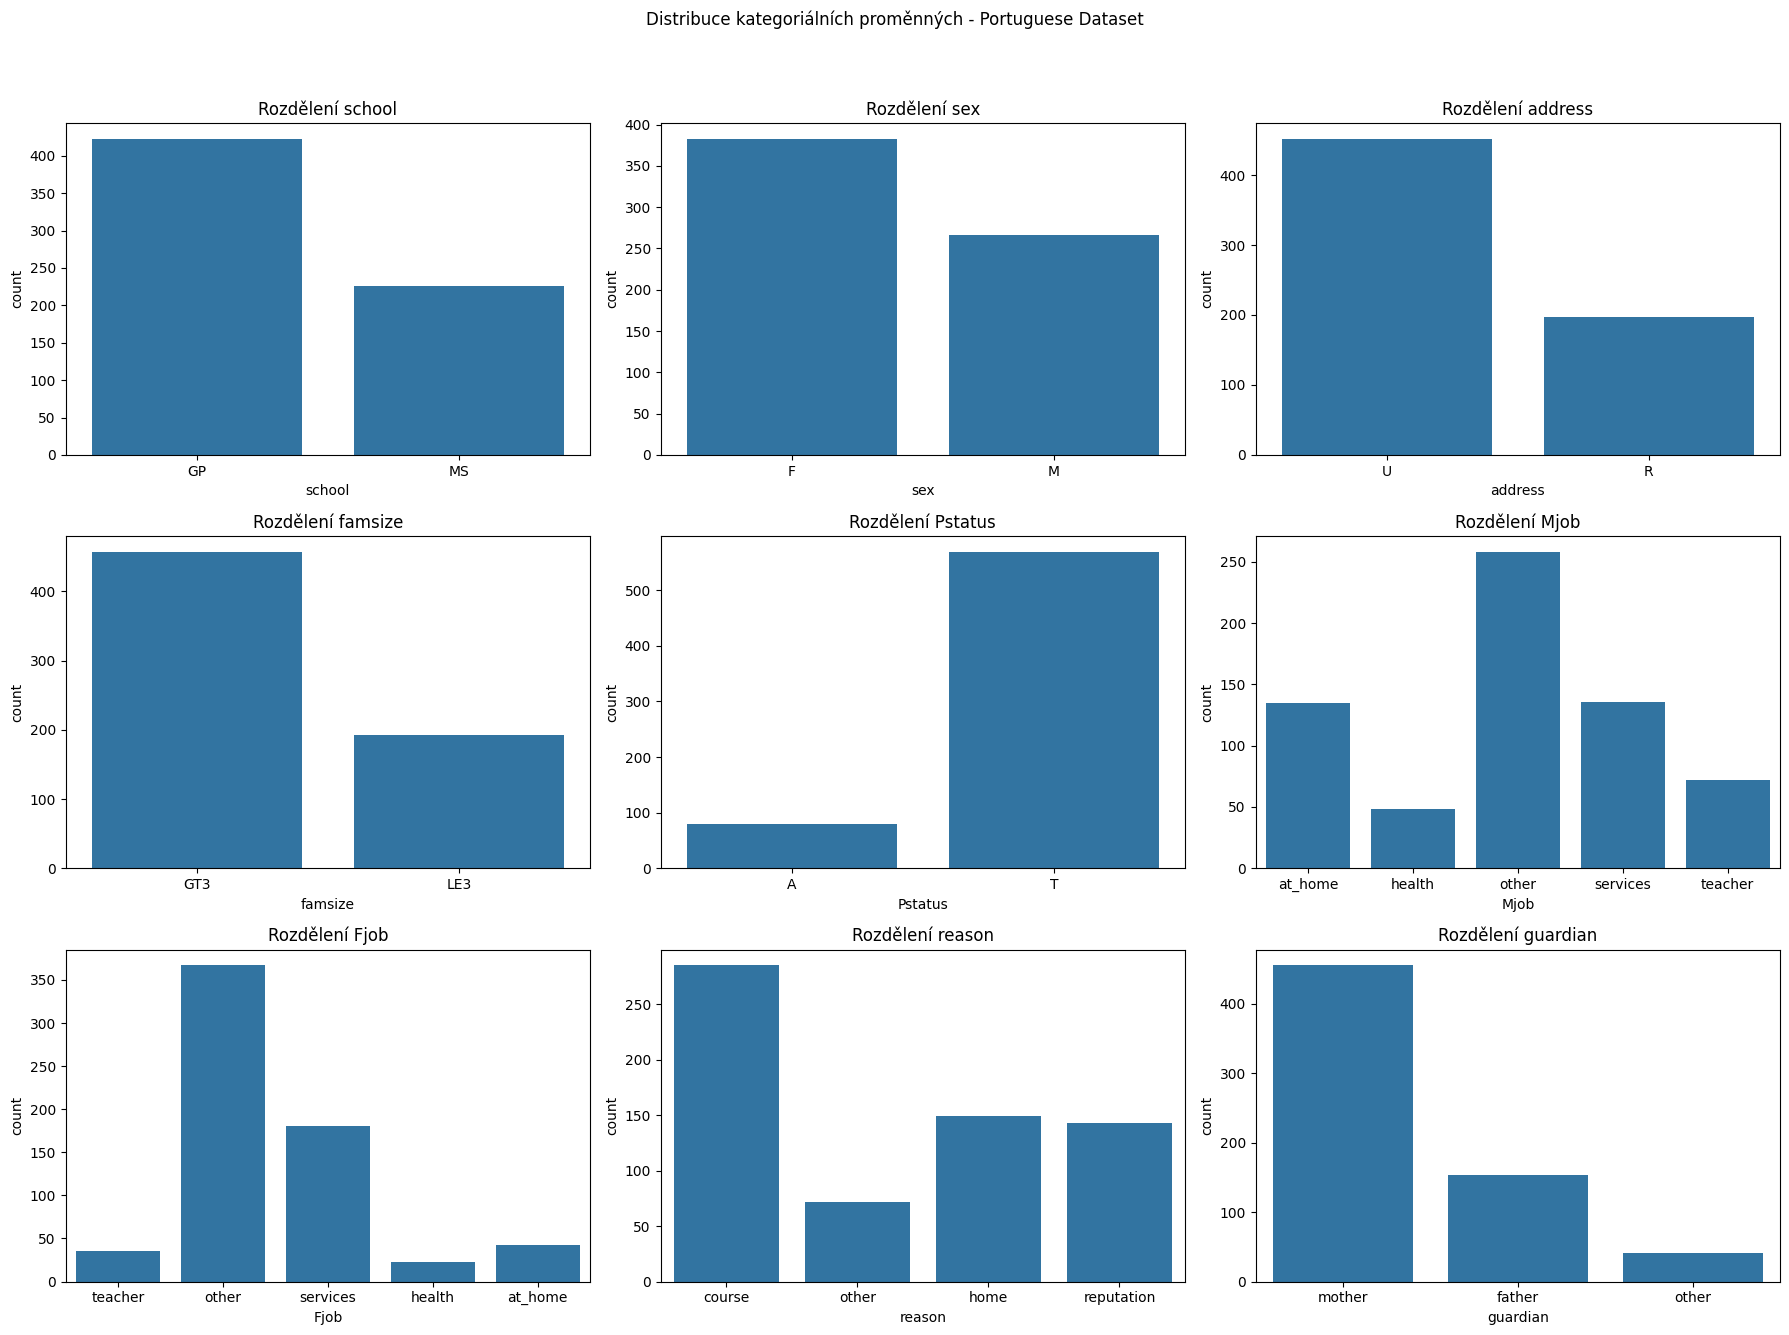

In [7]:
# Výběr kategoriálních proměnných pro vizualizaci
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                       'Mjob', 'Fjob', 'reason', 'guardian']

# Nastavení plátna pro vícero grafů (3 řádky, 3 sloupce)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Distribuce kategoriálních proměnných - Portuguese Dataset")

# Iterace přes jednotlivé proměnné a vykreslení sloupcových grafů
for i, col in enumerate(categorical_columns):
    row, col_in_row = divmod(i, 3)
    sns.countplot(data=df, x=col, ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(f"Rozdělení {col}")

# Uspořádání grafů
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Rozdělení school: Většina studentů pochází ze školy GP (Gabriel Pereira),  menší část studuje na škole MS (Mousinho da Silveira).

Rozdělení sex: V datasetu je více dívek (F) než chlapců (M).

Rozdělení address: Převážná část studentů žije ve městě (U), menší část bydlí na venkově (R).

Rozdělení famsize: Většina studentů pochází z rodin s více než třemi členy (GT3), menší část má rodinu s maximálně třemi členy (LE3).

Rozdělení Pstatus: Většina rodičů studentů žije společně (T), menší část žije odděleně (A).

Rozdělení Mjob (práce matky): Nejčastější zaměstnání matek je uvedeno jako other (jiné) a services (služby), nejméně matek pracuje v domácnosti nebo ve zdravotnictví.

Rozdělení Fjob (práce otce): Nejčastější práce otců je také uvedena jako other (jiné), následovaná services (služby). Nejmenší zastoupení mají učitelé a ti, kteří pracují v domácnosti.

Rozdělení reason (důvod pro výběr školy): Nejčastějším důvodem pro výběr školy je kurz (course), následuje vzdálenost od domu (home) a reputace školy. Nejmenší důvod má kategorie other.

Rozdělení guardian (opatrovník): Matka je nejčastějším opatrovníkem studentů,  otcové a jiní opatrovníci jsou méně zastoupeni.

# Vizualizace numerickych dat

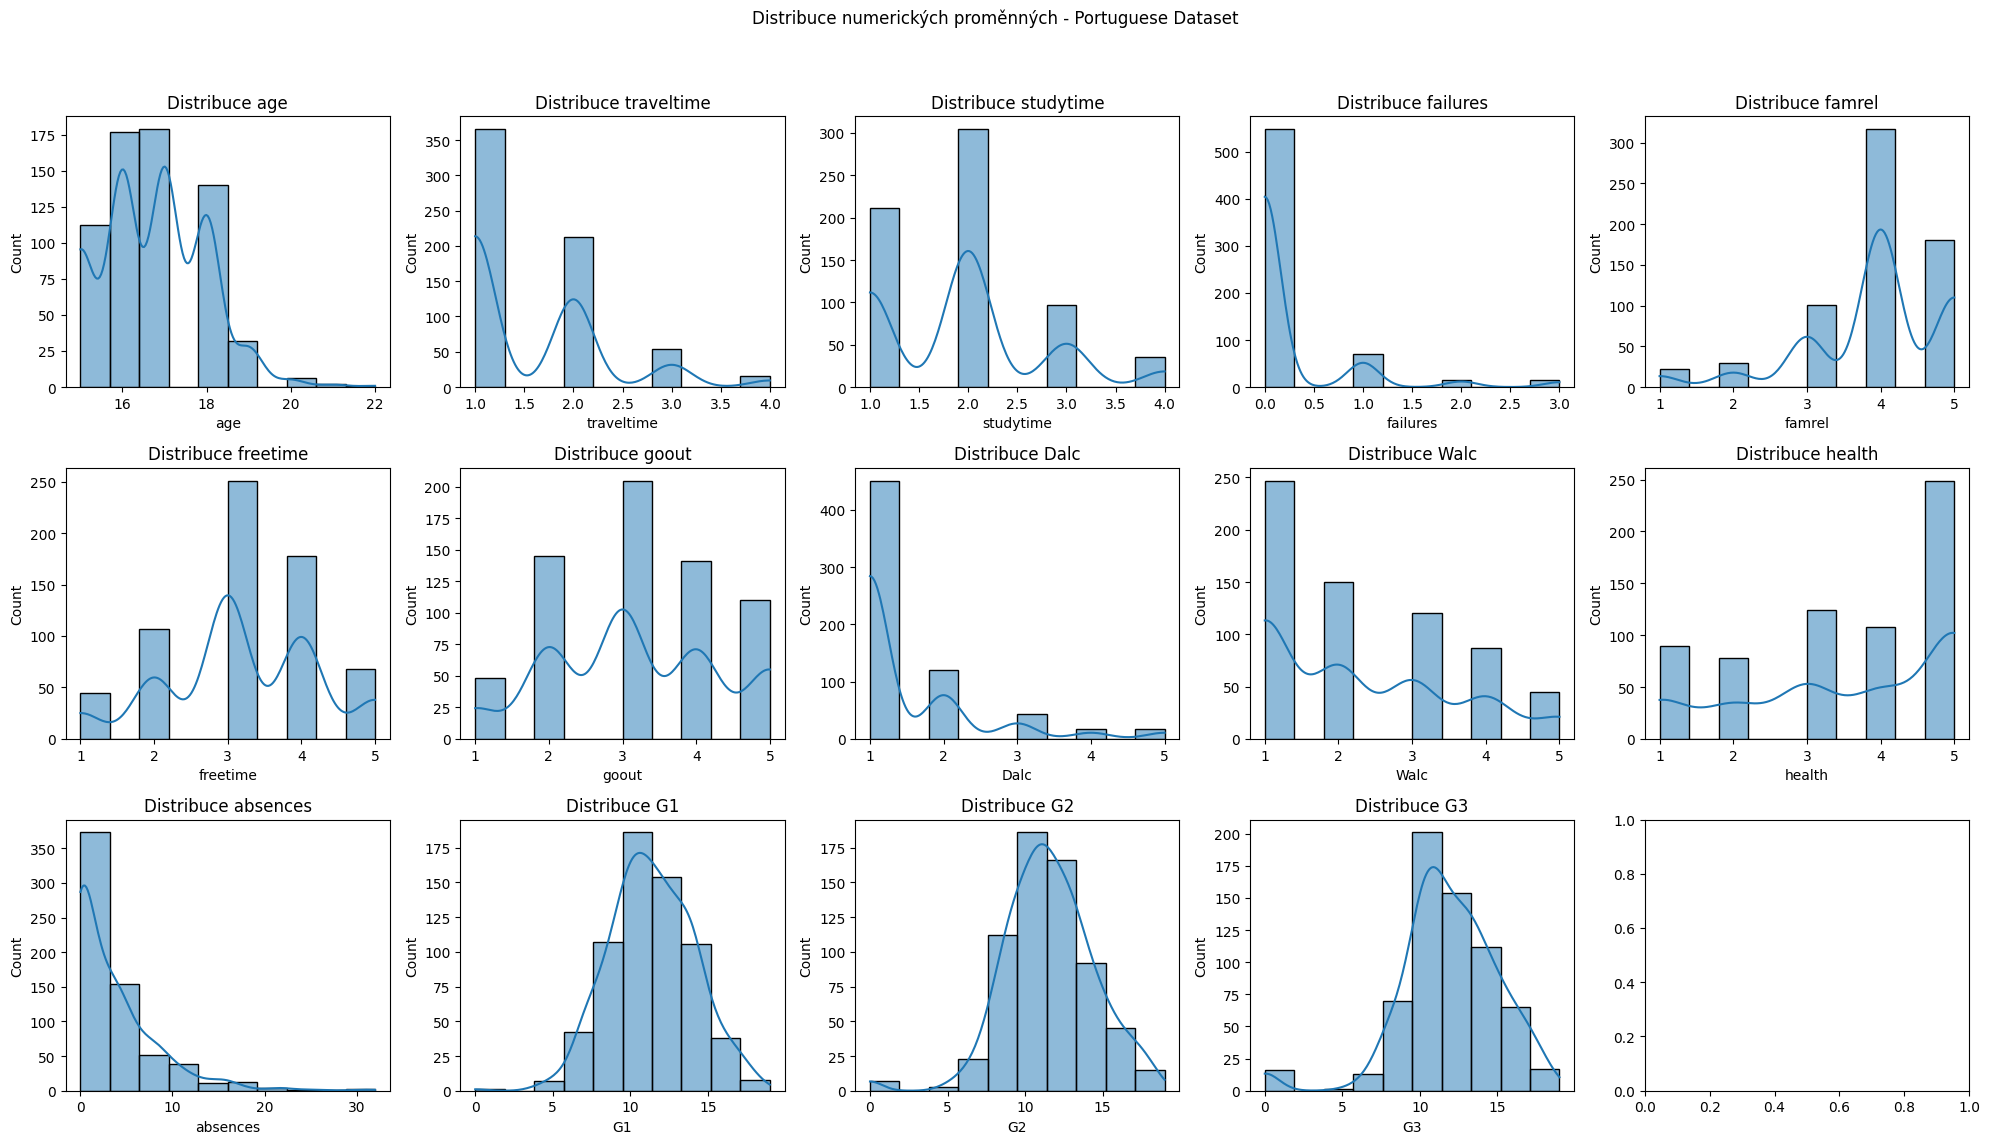

In [8]:
# Výběr numerických proměnných pro vizualizaci
numerical_columns = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                     'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Nastavení plátna pro vícero grafů (3 řádky, 5 sloupců)
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle("Distribuce numerických proměnných - Portuguese Dataset")

# Iterace přes jednotlivé proměnné a vykreslení histogramů
for i, col in enumerate(numerical_columns):
    row, col_in_row = divmod(i, 5)
    sns.histplot(df[col], bins=10, kde=True, ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(f"Distribuce {col}")

# Uspořádání grafů
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Distribuce age: Většina studentů je ve věku 16 až 18 let, s několika málo studenty ve věku nad 18 let.

Distribuce traveltime: Většina studentů dojíždí do školy méně než 15 minut (hodnota 1), jen málo studentů dojíždí déle než 1 hodinu.

Distribuce studytime: Nejvíce studentů studuje 2–5 hodin týdně (hodnota 2), jen málo studentů věnuje studiu více než 4 hodiny týdně.

Distribuce failures: Většina studentů nemá žádný neúspěch (hodnota 0), ale existuje několik studentů s více než jedním neúspěchem.

Distribuce famrel (kvalita rodinných vztahů): Většina studentů hodnotí své rodinné vztahy dobře, převážně na úrovni 4 nebo 5.

Distribuce freetime: Průměrná úroveň volného času se pohybuje kolem 3 až 4.

Distribuce goout (chození ven s přáteli): Mnoho studentů chodí ven často, hodnoty jsou rozloženy mezi 3 a 4.

Distribuce Dalc (konzumace alkoholu ve všední dny): Většina studentů konzumuje málo alkoholu ve všední dny (hodnota 1), vyšší hodnoty jsou vzácné.

Distribuce Walc (konzumace alkoholu o víkendech): Konzumace alkoholu je vyšší o víkendech než ve všední dny.

Distribuce health (aktuální zdravotní stav): Většina studentů hodnotí svůj zdravotní stav jako 4 nebo 5, což znamená, že jsou zdraví.

Distribuce absences: Většina studentů má málo absencí, u několika studentů je ale počet absencí vysoký.

Distribuce G1, G2, G3 (první, druhá a závěrečná známka): Známky se pohybují kolem střední hodnoty (10–12) na škále 0 až 20, s několika nízkými a vysokými hodnotami.
Rozložení těchto známek je podobné, což naznačuje konzistentní výsledky studentů.

# Korelační analýza

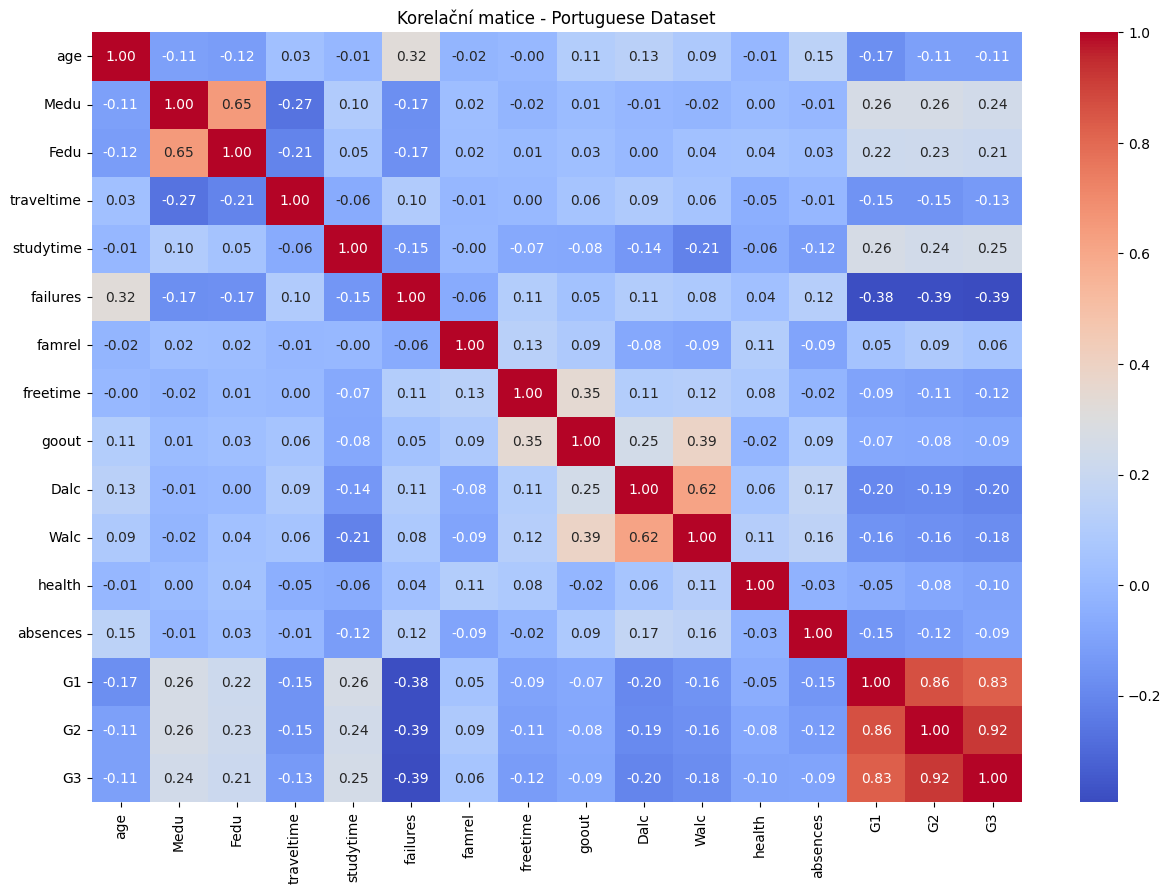

In [9]:
# Výběr pouze numerických sloupců
numeric_df = df.select_dtypes(include=['number'])

# Vykreslení korelační matice pro numerické proměnné
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelační matice - Portuguese Dataset")
plt.show()


Silné Korelace:

G1, G2, a G3 (známky v jednotlivých obdobích): Korelace mezi G1 a G2 je 0.86, mezi G2 a G3 je 0.92, a mezi G1 a G3 je 0.83.
Tyto silné pozitivní korelace naznačují, že studenti, kteří mají dobré výsledky v prvním a druhém období, mají tendenci dosahovat dobrých výsledků i ve třetím (závěrečném) období. Známky jsou konzistentní během celého školního roku.

Dalc a Walc (konzumace alkoholu ve všední dny a o víkendu): Korelace mezi Dalc a Walc je 0.62.
To ukazuje, že studenti, kteří mají tendenci konzumovat více alkoholu ve všední dny, často také konzumují více alkoholu o víkendech.

Medu a Fedu (vzdělání matky a otce): Korelace mezi Medu a Fedu je 0.65.
Tato korelace naznačuje, že vzdělání rodičů je podobné. Studenti, jejichž matky mají vyšší vzdělání, mívají i otce s vyšším vzděláním a naopak.

Slabé Korelace

age a G3 (věk a závěrečná známka): Korelace mezi age a G3 je -0.11, což je velmi slabá negativní korelace.
Naznačuje, že věk studentů má jen malý vliv na jejich závěrečnou známku. Starší nebo mladší studenti nemají v průměru výrazně lepší nebo horší výsledky.

health a G3 (zdraví a závěrečná známka): Korelace mezi health a G3 je -0.05.
To naznačuje, že zdravotní stav studentů nemá výrazný vliv na jejich výsledky.

traveltime a studytime (doba cestování a čas strávený studiem): Korelace mezi traveltime a studytime je -0.06.
Korelace naznačuje, že čas strávený dojížděním do školy nemá významný vliv na čas, který studenti věnují studiu.

# Data preprocesing

Výběr proměnných: School, guardian, traveltime mají minimální vliv na na akademický výkon. Z předchozí analýzy víme, že aktuální zdravotní stav studenta (health) také nehraje žádnou výraznou roli. Tyto proměnné tudíž nepoužijeme.

Kategoriální proměnné musíme převést na číselnou reprezentaci, aby s nimi mohl K-Means pracovat. Použijeme techniku One-Hot Encoding.

Pro clustering algoritmy je důležité, aby proměnné měly podobné rozsahy hodnot. Použijeme Standard Scaling, abychom zajistili, že numerické proměnné budou mít srovnatelné rozsahy.

In [ ]:
# Výběr kategoriálních a numerických proměnných
categorical_features = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'schoolsup', 'famsup',
                        'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical_features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                      'Walc', 'absences', 'G1', 'G2', 'G3']

# Definování preprocessoru
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Aplikace preprocessoru na dataset
X = preprocessor.fit_transform(df)

# Aplikování K-Means a určení optimálního počtu klastrů pomocí elbow metody

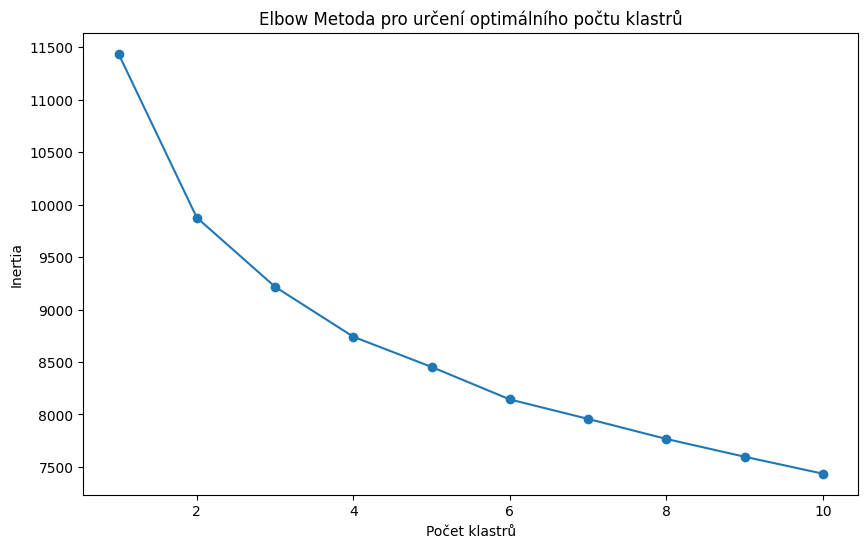

In [11]:
inertia = []

# Testujeme pro počet klastrů od 1 do 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Vykreslení Elbow grafu
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Počet klastrů')
plt.ylabel('Inertia')
plt.title('Elbow Metoda pro určení optimálního počtu klastrů')
plt.show()

Z grafu Elbow metody můžeme pozorovat, že pokles hodnoty inertia začíná zpomalovat kolem 4 nebo 5 klastrů. Toto místo, kde se ohyb křivky vyrovnává, naznačuje potenciálně optimální počet klastrů.

In [12]:
# Aplikace K-Means s počtem klastrů = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Zobrazení prvních pár řádků s přiřazenými klastrů
print(df[['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'cluster']].head())


   age  Medu  Fedu  studytime  failures  famrel  freetime  Dalc  Walc  \
0   18     4     4          2         0       4         3     1     1   
1   17     1     1          2         0       5         3     1     1   
2   15     1     1          2         0       4         3     2     3   
3   15     4     2          3         0       3         2     1     1   
4   16     3     3          2         0       4         3     1     2   

   absences  G1  G2  G3  cluster  
0         4   0  11  11        2  
1         2   9  11  11        0  
2         6  12  13  12        0  
3         0  14  14  14        1  
4         0  11  13  13        0  


# Vytvoření Boxplotů pro Klíčové Proměnné:

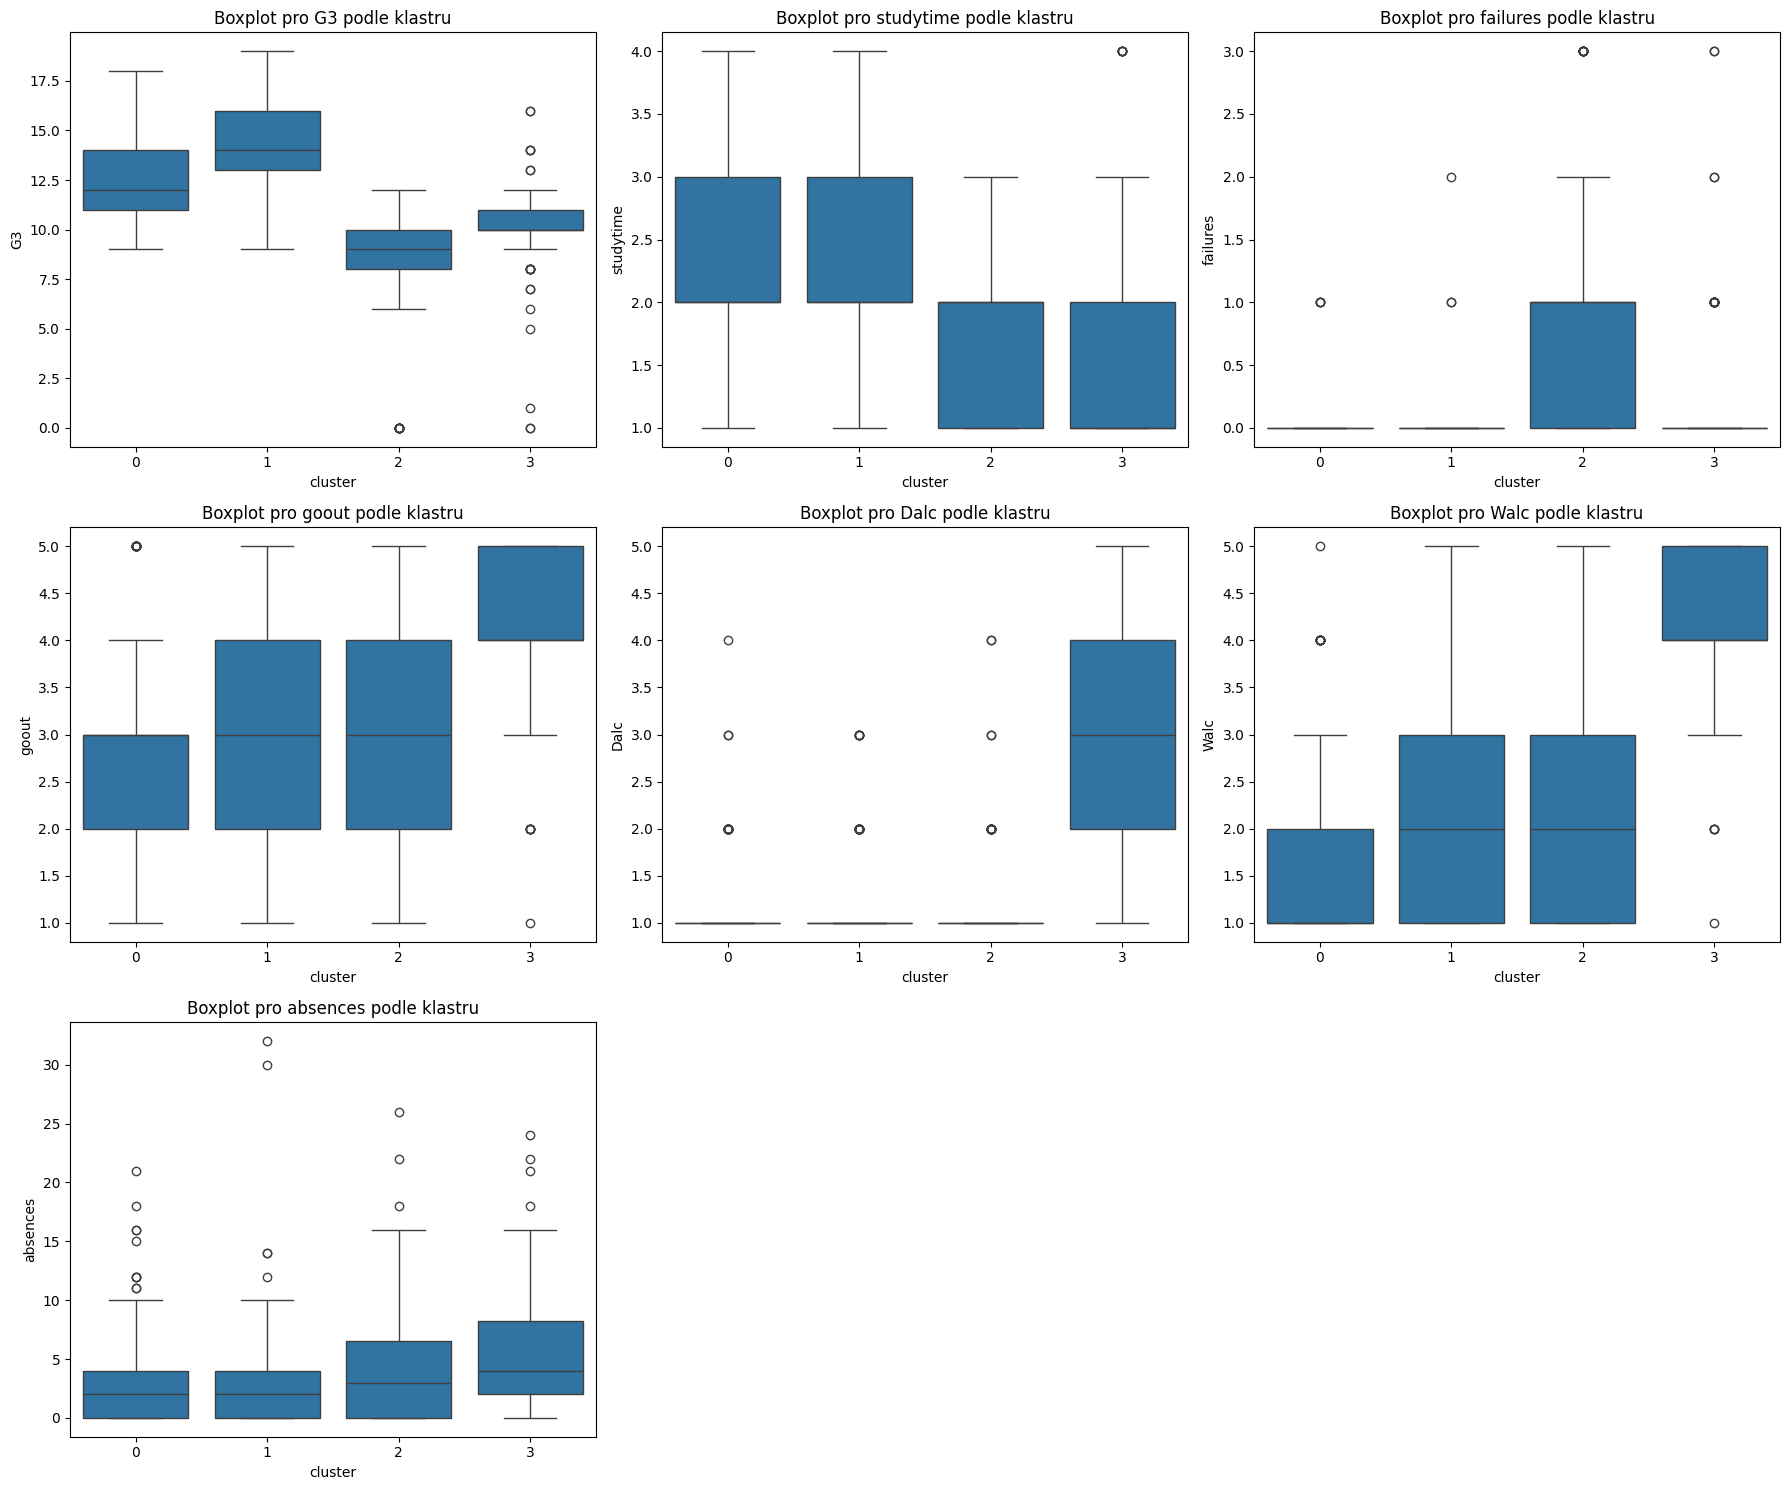

In [13]:
# Seznam klíčových proměnných, které chceme prozkoumat pro každý klastr
key_features = ['G3', 'studytime', 'failures', 'goout', 'Dalc', 'Walc', 'absences']

# Vytvoření boxplotů pro každou klíčovou proměnnou
plt.figure(figsize=(18, 15))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='cluster', y=feature)
    plt.title(f"Boxplot pro {feature} podle klastru")
plt.tight_layout()
plt.show()

Cluster 0:

G3 (závěrečná známka): Střední známky, medián kolem 12–13.

Studytime (studijní čas): Střední studijní čas, většina studentů věnuje studiu 2–3 hodiny týdně.

Failures (neúspěchy): Málo neúspěchů, většina studentů nemá žádný neúspěch.

Goout (chození ven): Střední úroveň chození ven, medián kolem 3.

Dalc (alkohol ve všední dny): Nízká konzumace alkoholu ve všední dny.

Walc (alkohol o víkendu): Střední konzumace alkoholu o víkendu.

Absences (absence): Málo absencí, většina má kolem 0–5 absencí.

Cluster 1

G3: Nejvyšší průměrné známky, medián kolem 15–16.

Studytime: Vyšší studijní čas, většina studentů věnuje studiu více než 3 hodiny týdně.

Failures: Málo neúspěchů, podobně jako klastr 0.

Goout: Průměrně časté chození ven, ale o něco nižší než u klastru 0.

Dalc a Walc: Nízká až střední konzumace alkoholu, spíše o víkendu.

Absences: Nízký počet absencí.

Cluster 2

G3: Nejnižší průměrné známky, medián kolem 8–10.

Studytime: Nižší studijní čas, většina studentů se věnuje studiu méně než 2 hodiny týdně.

Failures: Nejvyšší počet neúspěchů ze všech klastrů.

Goout: Častější chození ven, medián kolem 3–4.

Dalc a Walc: Střední až vyšší konzumace alkoholu, hlavně o víkendech.

Absences: Vyšší počet absencí než v ostatních klastrech.

Cluster 3

G3: Střední až nižší známky, medián kolem 10–11.

Studytime: Střední studijní čas, většina studentů věnuje studiu 2–3 hodiny týdně.

Failures: Málo neúspěchů, podobně jako klastr 0 a 1.

Goout: Nejčastější chození ven ze všech klastrů.

Dalc a Walc: Vyšší spotřeba alkoholu jak ve všední dny, tak o víkendech.

Absences: Vyšší počet absencí než v klastrech 0 a 1, ale nižší než v klastru 2.

# Celkový závěr

Na základě analýzy klastrů jsme identifikovali čtyři typy studentů, kteří se liší svým akademickým výkonem, životním stylem a návyky.

Studenti, kteří tráví více času učením se a méně konzumují alkohol, mají tendenci dosahovat lepších výsledků (klastr 1), zatímco studenti, kteří častěji chodí ven a častěji konzumují alkohol dosahují nižšího výkonu (klastr 2).

Klastry ukázaly, že studenti, kteří častěji provozují nějaké společenské aktivity a častěji konzumují alkohol, mají obecně nižší průměrné známky (klastry 2 a 3). To naznačuje, že nadměrná sociální aktivita a vyšší konzumace alkoholu mohou nepříznivě ovlivnit akademický výkon.

Hypotézy:

Má množství absencí vliv na závěrečnou známku (G3)?

Ano, analýza naznačuje, že vyšší počet absencí má negativní vliv na závěrečnou známku.

Jak se liší průměrné známky mezi pohlavími (sex)?

Na základě dat nebyly v analýze klastrů výrazné rozdíly v prospěchu mezi klukama a holkama.

Ovlivňuje konzumace alkoholu během týdne (Dalc) a víkendu (Walc) akademické výsledky?

Ano, konzumace alkoholu má vliv na akademický výkon. Studenti v klastru 2 a 3, kteří častěji konzumují alkohol, dosahují nižších průměrných známek než studenti v klastru 1, kteří konzumují málo alkoholu a dosahují lepších výsledků.

Jaký vliv má studijní čas (studytime) na výslednou známku?

Studijní čas má pozitivní vliv na závěrečnou známku. Studenti, kteří věnují více času studiu (klastr 1), dosahují nejlepších průměrných známek, zatímco studenti, kteří nevěnují studiu tolik času (klastr 2) mají tendenci dosahovat horších výsledků.

Shrnutí:

Tato analýza ukázala, že studenti mají rozmanité přístupy k životnímu stylu a akademickému výkonu. Výsledky ukazují, že absencí, studijní čas, a konzumace alkoholu mají výrazný vliv na akademický úspěch, zatímco pohlaví studentů se ukázalo jako méně významné.





